In [11]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from xgboost import XGBClassifier, XGBRegressor

In [41]:
# Load preprocessed data (assumes a CSV file named 'prepared_data.csv' in the same folder)
data = pd.read_csv('codeforces_feature_dataset_v1.1.csv')


# drop all rows with missing values
data = data.dropna()

# Assume the last column is the target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]


In [42]:
X.columns


Index(['user_handle', 'submission_time', 'problem_contestId', 'problem_index',
       'problem_rating', 'rating_diff', 'user_rating', 'user_success_rate',
       'user_total_submissions', 'avg_tag_success_rate', 'time_since_last_sub',
       'recent_sub_count', 'abs_difficulty_offset'],
      dtype='object')

In [43]:
# only this filtered columns allowed
allowed_columns = [
       'problem_rating', 'rating_diff', 'user_rating', 'user_success_rate',
       'user_total_submissions', 'avg_tag_success_rate', 'time_since_last_sub',
       'recent_sub_count', 'abs_difficulty_offset']
encode_columns = ['problem_index']

X = X[allowed_columns]
# X = pd.get_dummies(X, columns=encode_columns, drop_first=True)



In [44]:
X

,problem_rating,rating_diff,user_rating,user_success_rate,user_total_submissions,avg_tag_success_rate,time_since_last_sub,recent_sub_count,abs_difficulty_offset
0,3000.0,841.0,3841.0,0.77600,1000,0.745116,1806.0,27,841.0
1,3500.0,341.0,3841.0,0.77600,1000,0.827119,3035.0,26,341.0
2,2900.0,941.0,3841.0,0.77600,1000,0.824420,933.0,25,941.0
3,2000.0,1841.0,3841.0,0.77600,1000,0.739176,419.0,24,1841.0
4,2200.0,1641.0,3841.0,0.77600,1000,0.771850,150.0,23,1641.0
...,...,...,...,...,...,...,...,...,...
140802,2400.0,-384.0,2016.0,0.53527,241,0.500000,216958.0,6,384.0
140803,2000.0,16.0,2016.0,0.53527,241,0.000000,50.0,5,16.0
140804,2000.0,16.0,2016.0,0.53527,241,0.000000,725.0,4,16.0
140805,2000.0,16.0,2016.0,0.53527,241,0.000000,278.0,3,16.0


In [45]:
X.isna().sum()


problem_rating            0
rating_diff               0
user_rating               0
user_success_rate         0
user_total_submissions    0
avg_tag_success_rate      0
time_since_last_sub       0
recent_sub_count          0
abs_difficulty_offset     0
dtype: int64

In [46]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train a Logistic Regression model
model = XGBClassifier()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score

# # Evaluate R² score instead of accuracy
# r2 = r2_score(y_test, y_pred)
# print(f"Model R² score: {r2:.2f}")


# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")

Model accuracy: 0.66


              precision    recall  f1-score   support

           0       0.65      0.67      0.66     15248
           1       0.68      0.66      0.67     16123

    accuracy                           0.66     31371
   macro avg       0.66      0.66      0.66     31371
weighted avg       0.66      0.66      0.66     31371



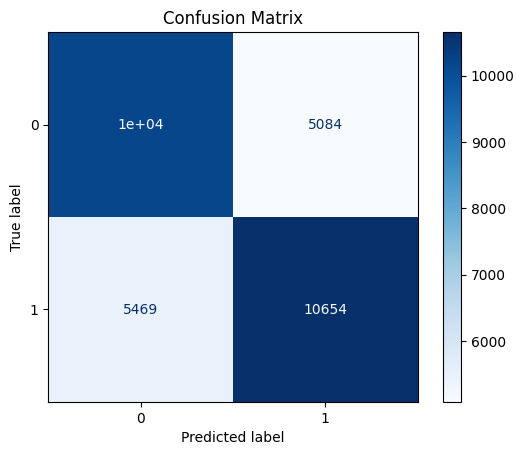

In [47]:
#  print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


# Compute and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
